# Carregando os dados e preparando análise

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns

## Importando datasets e os visualizando

As colunas devem ser renomeadas para snake_case, os dispositivos devem ser do tipo category para economizar memória, e as datas deve estar no formato datetime64 para economizar memória também.

In [2]:
df_visits = pd.read_csv('datasets/visits_log_us.csv', dtype={'device': 'category'}, parse_dates=['start_ts', 'end_ts'], names=['device', 'end_ts', 'source_id', 'start_ts', 'uid'], header=0)
df_orders = pd.read_csv('datasets/orders_log_us.csv', parse_dates=['buy_ts'], names=['buy_ts', 'revenue', 'uid'], header=0)
df_costs = pd.read_csv('datasets/costs_us.csv', parse_dates=['dt'])

In [3]:
df_visits.info(memory_usage='deep')
df_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
df_orders.info(memory_usage='deep')
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
df_costs.info(memory_usage='deep')
df_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


# Relatórios e Métricas 

## Produto

### Quantas pessoas usam-no cada dia, semana e mês?

start_day
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64


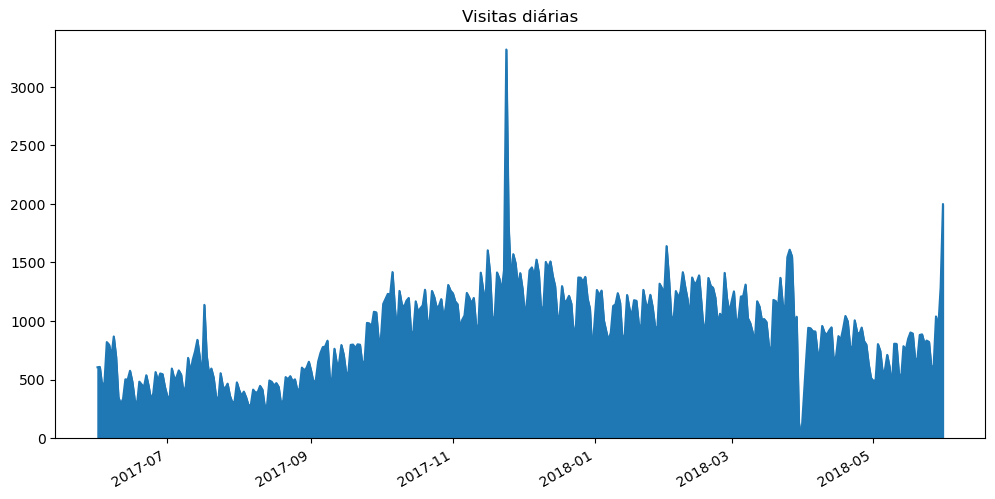

In [6]:
df_visits['start_day'] = df_visits['start_ts'].dt.floor('D')
visitas_diarias = df_visits.groupby('start_day')['uid'].nunique()

print(visitas_diarias)

visitas_diarias.plot(kind='area', title='Visitas diárias', figsize=(12, 6))
plt.xlabel('')
plt.show()

start_week
2017-05-29     2021
2017-06-05     4129
2017-06-12     2812
2017-06-19     2878
2017-06-26     3064
2017-07-03     3294
2017-07-10     4355
2017-07-17     3841
2017-07-24     2655
2017-07-31     2364
2017-08-07     2444
2017-08-14     2746
2017-08-21     3116
2017-08-28     3694
2017-09-04     4412
2017-09-11     4319
2017-09-18     4874
2017-09-25     6241
2017-10-02     7612
2017-10-09     7074
2017-10-16     7148
2017-10-23     7401
2017-10-30     7480
2017-11-06     7179
2017-11-13     8117
2017-11-20    10586
2017-11-27     8166
2017-12-04     8407
2017-12-11     8214
2017-12-18     7172
2017-12-25     7774
2018-01-01     6918
2018-01-08     6703
2018-01-15     6972
2018-01-22     7060
2018-01-29     8111
2018-02-05     7908
2018-02-12     7759
2018-02-19     7518
2018-02-26     7395
2018-03-05     6844
2018-03-12     6225
2018-03-19     7898
2018-03-26     4940
2018-04-02     5383
2018-04-09     5494
2018-04-16     5740
2018-04-23     5503
2018-04-30     3916
2018-05-0

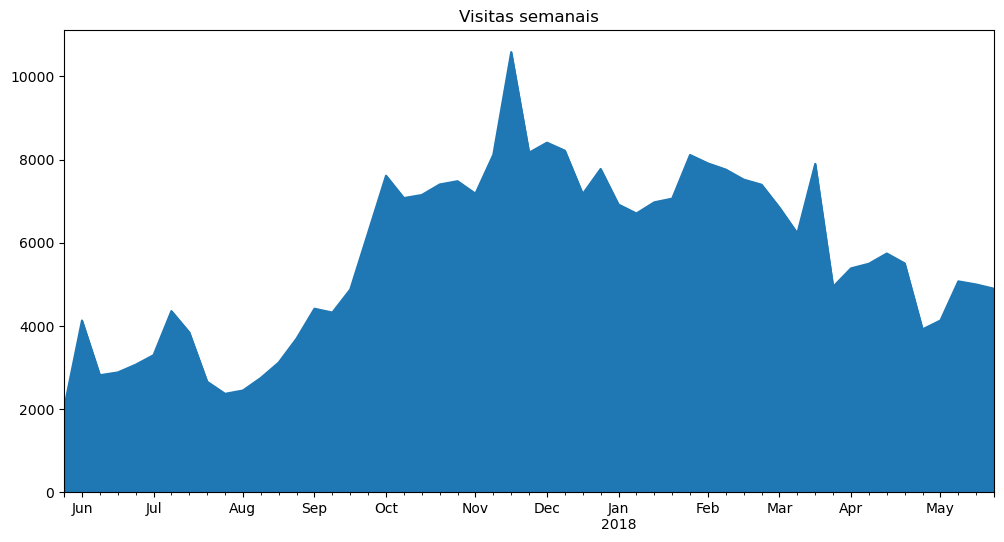

In [7]:
df_visits['start_week'] = pd.to_datetime(df_visits['start_day'], unit='d') - pd.to_timedelta(df_visits['start_day'].dt.dayofweek, unit='d')
visitas_semanais = df_visits.groupby('start_week')['uid'].nunique()

print(visitas_semanais)

visitas_semanais.plot(kind='area', title='Visitas semanais', figsize=(12, 6))
plt.xlabel('')
plt.show()

start_month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
2017-11    32797
2017-12    31557
2018-01    28716
2018-02    28749
2018-03    27473
2018-04    21008
2018-05    20701
Freq: M, Name: uid, dtype: int64


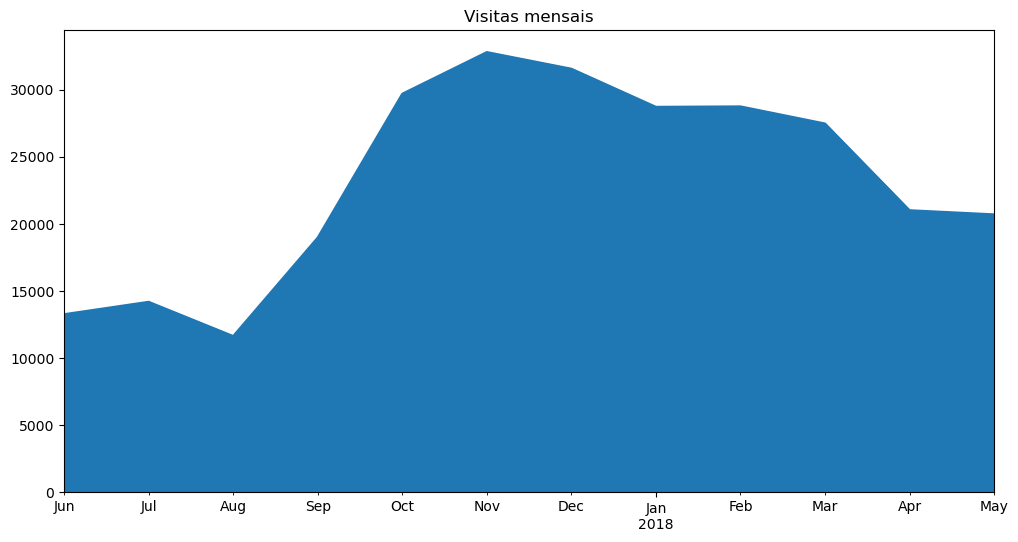

In [8]:
#df_visits['start_month'] = pd.to_datetime(df_visits['start_day'], unit='d') - pd.to_timedelta(df_visits['start_day'].dt.day, unit='d')
df_visits['start_month'] = df_visits['start_day'].dt.to_period('M')
visitas_mensais = df_visits.groupby('start_month')['uid'].nunique()

print(visitas_mensais)

visitas_mensais.plot(kind='area', title='Visitas mensais', figsize=(12, 6))
plt.xlabel('')
plt.show()

### Quantas sessões ocorrem por dia? 

start_day
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Name: uid, Length: 364, dtype: int64


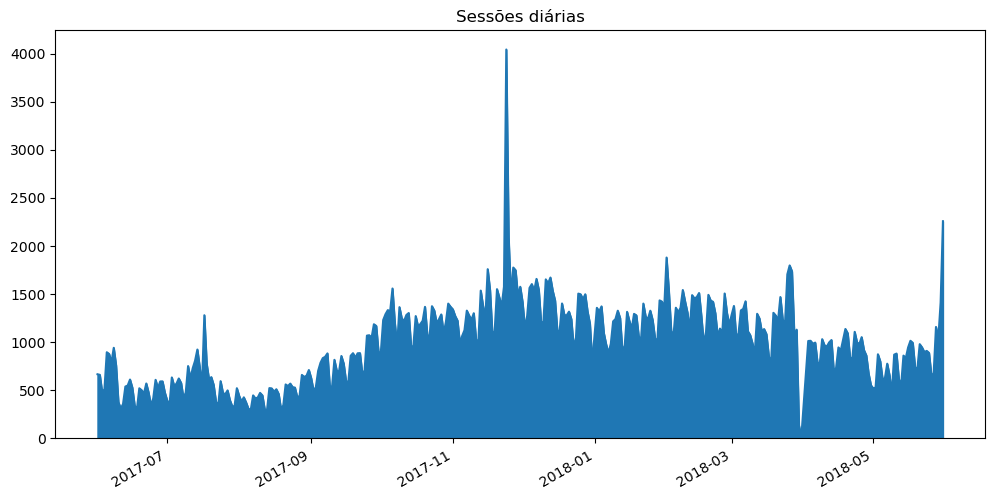

In [9]:
sessoes_diarias = df_visits.groupby('start_day')['uid'].count()

print(sessoes_diarias)

sessoes_diarias.plot(kind='area', title='Sessões diárias', figsize=(12, 6))
plt.xlabel('')
plt.show()

### Que comprimento tem cada sessão?

0         1080
1         1680
2            0
3         1440
4            0
          ... 
359395      19
359396      19
359397      19
359398      19
359399      19
Name: session_duration_sec, Length: 359400, dtype: int32


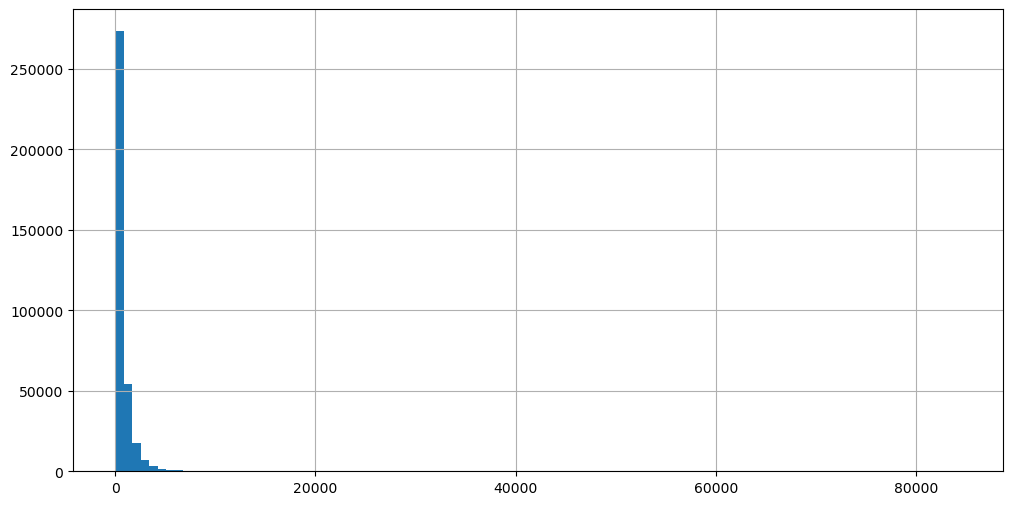

In [10]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds

print(df_visits['session_duration_sec'])

df_visits['session_duration_sec'].hist(bins=100, figsize=(12, 6))
plt.xlabel('')
plt.show()

### Com que frequência os usuários voltam?

In [11]:
df_visits.groupby(['start_month', 'uid'])['uid'].count().mean()

1.2893689841106977

Os usuários retornam, em média, 1.29x ao mês.

## Vendas

### Quando as pessoas começam a comprar?

Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência.

In [12]:
print(df_visits.head())
df_orders.head()

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  start_day start_week start_month  \
0  16879256277535980062 2017-12-20 2017-12-18     2017-12   
1    104060357244891740 2018-02-19 2018-02-19     2018-02   
2   7459035603376831527 2017-07-01 2017-06-26     2017-07   
3  16174680259334210214 2018-05-20 2018-05-14     2018-05   
4   9969694820036681168 2017-12-27 2017-12-25     2017-12   

   session_duration_sec  
0                  1080  
1                  1680  
2                     0  
3                  1440  
4                     0  


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Criando coluna com dia do primeiro pedido no df_orders

In [13]:
first_order = df_orders.groupby('uid')['buy_ts'].min().dt.floor('D')
first_order.name = 'first_order'
df_orders = df_orders.join(first_order, on='uid')

In [14]:
df_orders.head()

,buy_ts,revenue,uid,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


Criando coluna com mês do primeiro pedido

In [15]:
df_orders['first_order_month'] = df_orders['first_order'].dt.to_period('M')
df_orders.head()

,buy_ts,revenue,uid,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06


Criando coluna com dia da primeira sessão no df_visits

In [16]:
first_session = df_visits.groupby('uid')['start_ts'].min().dt.floor('D')
first_session.name = 'first_session'
df_visits = df_visits.join(first_session, on='uid')

Criando df com o tempo até a primeira compra

In [17]:
df_conv = pd.merge(first_order, first_session, on='uid')
df_conv['time_to_buy'] = df_conv['first_order'] - df_conv['first_session']
df_conv.head()

,first_order,first_session,time_to_buy
uid,,,
313578113262317,2018-01-03,2017-09-18,107 days
1575281904278712,2017-06-03,2017-06-03,0 days
2429014661409475,2017-10-11,2017-10-11,0 days
2464366381792757,2018-01-28,2018-01-27,1 days
2551852515556206,2017-11-24,2017-11-24,0 days


In [18]:
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36523 entries, 313578113262317 to 18446167067214817906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   first_order    36523 non-null  datetime64[ns] 
 1   first_session  36523 non-null  datetime64[ns] 
 2   time_to_buy    36523 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), timedelta64[ns](1)
memory usage: 1.1 MB


time_to_buy
0      68.556800
1       5.382909
2       1.875530
3       1.237576
4       1.056868
         ...    
343     0.002738
282     0.002738
318     0.002738
353     0.002738
358     0.002738
Name: proportion, Length: 349, dtype: float64


<Axes: >

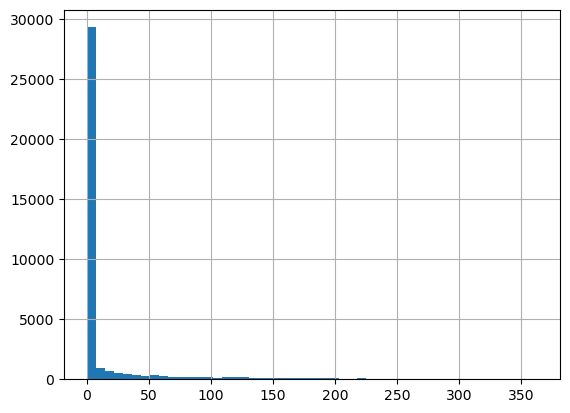

In [19]:
print(df_conv['time_to_buy'].dt.days.value_counts(normalize=True)*100)
df_conv['time_to_buy'].dt.days.hist(bins=50)

Vemos então que quase 70% dos primeiros pedidos são feitos no mesmo dia da primeira sessão do usuário.

#### Eficiência dos canais de marketing

In [20]:
df_conv = df_conv.reset_index().merge(df_visits[['uid', 'device', 'source_id']].drop_duplicates(subset=['uid']), on='uid')
df_conv

,uid,first_order,first_session,time_to_buy,device,source_id
0,313578113262317,2018-01-03,2017-09-18,107 days,desktop,2
1,1575281904278712,2017-06-03,2017-06-03,0 days,touch,10
2,2429014661409475,2017-10-11,2017-10-11,0 days,desktop,3
3,2464366381792757,2018-01-28,2018-01-27,1 days,desktop,5
4,2551852515556206,2017-11-24,2017-11-24,0 days,desktop,5
...,...,...,...,...,...,...
36518,18445147675727495770,2017-11-24,2017-08-20,96 days,touch,5
36519,18445407535914413204,2017-09-22,2017-09-22,0 days,desktop,3
36520,18445601152732270159,2018-03-26,2017-08-07,231 days,desktop,2
36521,18446156210226471712,2018-02-18,2017-11-07,103 days,desktop,3


In [21]:
df_conv['first_order_month'] = df_conv['first_order'].dt.to_period('M')

In [22]:
df_conv.pivot_table(
    index='source_id',
    columns='first_order_month',
    values='time_to_buy',
    aggfunc='mean'
)

first_order_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
source_id,,,,,,,,,,,,,
1,0 days 18:40:47.290640394,3 days 22:31:16.777251184,6 days 22:30:37.241379310,8 days 17:18:01.272084805,8 days 12:29:55.599022004,13 days 23:05:50.442477876,12 days 07:04:27.248908297,20 days 23:25:48.961424332,16 days 23:01:33.913043478,25 days 08:24:49.655172413,26 days 04:42:07.346938775,22 days 14:08:59.413680781,NaT
2,1 days 17:10:50.922509225,5 days 10:05:08.171206225,12 days 06:35:17.647058823,14 days 07:01:21.028938906,12 days 18:27:28.192771084,17 days 18:08:22.325581395,21 days 13:06:13.385518591,33 days 11:32:42.682215743,24 days 23:48:36.094986807,37 days 20:36:58.276762402,36 days 12:34:17.142857143,34 days 00:12:49.710467706,NaT
3,0 days 09:42:01.254355400,2 days 06:30:04.063205417,4 days 10:30:37.241379310,5 days 11:25:30.139103554,7 days 04:46:53.152804642,11 days 17:21:09.970845481,13 days 18:25:50.963222416,16 days 18:35:16.646989374,22 days 11:15:33.333333333,29 days 08:49:27.681498829,29 days 20:27:10.710172744,38 days 09:19:29.426751592,NaT
4,0 days 19:54:49.208633093,3 days 09:00:00,5 days 12:28:26.990881458,10 days 22:08:51.046312178,8 days 15:24:24.737793851,11 days 10:16:57.600000,14 days 09:33:05.725368502,17 days 13:59:31.200000,24 days 00:30:25.936599423,22 days 17:08:34.285714285,29 days 13:24:50.030211480,37 days 12:06:34.263363755,1 days
5,0 days 07:41:44.347826086,1 days 18:34:50.322580645,3 days 01:31:21.570996978,4 days 08:27:04.615384615,6 days 17:08:47.586206896,11 days 02:55:20.547945205,12 days 19:44:44.167794316,16 days 18:41:43.863987635,17 days 01:34:17.142857142,26 days 13:30:47.957371225,27 days 12:49:32.477064220,28 days 04:16:56.470588235,NaT
7,NaT,NaT,0 days 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,1 days 14:12:48.932038834,5 days 09:36:00,7 days 01:42:51.428571428,12 days 19:50:46.153846153,22 days 16:24:49.655172413,20 days 12:34:17.142857142,26 days 03:55:38.181818182,37 days 13:17:08.571428571,63 days 00:00:00,58 days 13:45:00,91 days 08:00:00,76 days 17:12:27.169811321,NaT
10,0 days 11:02:04.137931034,1 days 08:20:52.173913043,3 days 20:45:24.324324324,3 days 15:10:35.294117647,4 days 21:59:22.303664921,10 days 20:48:50.973451327,16 days 07:17:28.101265822,14 days 06:37:14.482758620,15 days 14:17:08.571428571,22 days 11:27:38.426966292,11 days 20:08:34.285714285,41 days 05:44:36.923076923,NaT


In [23]:
df_visits.groupby('source_id')['uid'].count()

source_id
1      34121
2      47626
3      85610
4     101794
5      66905
6          6
7         36
9      13277
10     10025
Name: uid, dtype: int64

Vemos então que os canais de marketing 1 e 10 têm maior eficiência em fazer os clientes comparem em menos tempo

#### Eficiência de cada dispositivo em motivar a compra

In [24]:
df_conv.pivot_table(
    index='device',
    columns='first_order_month',
    values='time_to_buy',
    aggfunc='mean'
)

C:\Users\Gabriel Tranquilli\AppData\Local\Temp\ipykernel_7508\1457210895.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_conv.pivot_table(


first_order_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
device,,,,,,,,,,,,,
desktop,0 days 18:01:43.102625298,3 days 03:16:42.652519893,5 days 07:41:53.207547169,7 days 23:29:15.458515283,7 days 23:37:05.063938618,12 days 04:29:34.038461538,14 days 05:41:36.260348273,19 days 07:19:10.543274634,22 days 13:04:48.457465584,27 days 19:05:18.857142857,29 days 19:48:10.525175961,34 days 17:34:24.974619289,1 days
touch,0 days 18:15:33.717579250,3 days 04:51:28.192771084,7 days 01:35:15.175097276,8 days 16:00:55.384615384,12 days 00:26:18.562728380,16 days 06:22:28.207171314,18 days 07:56:10.909090909,21 days 11:33:24.545454545,23 days 06:37:50.904645476,32 days 12:18:39.781718963,31 days 04:01:40.699300699,35 days 16:11:32.307692307,NaT


Clientes de Desktop parecem ter uma tendência ligeiramente maior a fazerem a compra em menos tempo após o registro

### Quantos pedidos os clientes fazem durante um determinado período de tempo?

In [25]:
df_orders.head()

,buy_ts,revenue,uid,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06


In [26]:
df_orders['order_week'] = df_orders['first_order'].dt.to_period('W')
df_orders['first_order_week'] = df_orders['first_order'].dt.to_period('W')
df_orders.head()

,buy_ts,revenue,uid,first_order,first_order_month,order_week,first_order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04


In [27]:
pd.set_option("display.max_rows", 70)
df_pedidos = df_orders.drop_duplicates(subset=['uid']).groupby(['first_order_month'])['uid'].count().reset_index()
df_pedidos.head(63)

,first_order_month,uid
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


<Axes: ylabel='first_order_month'>

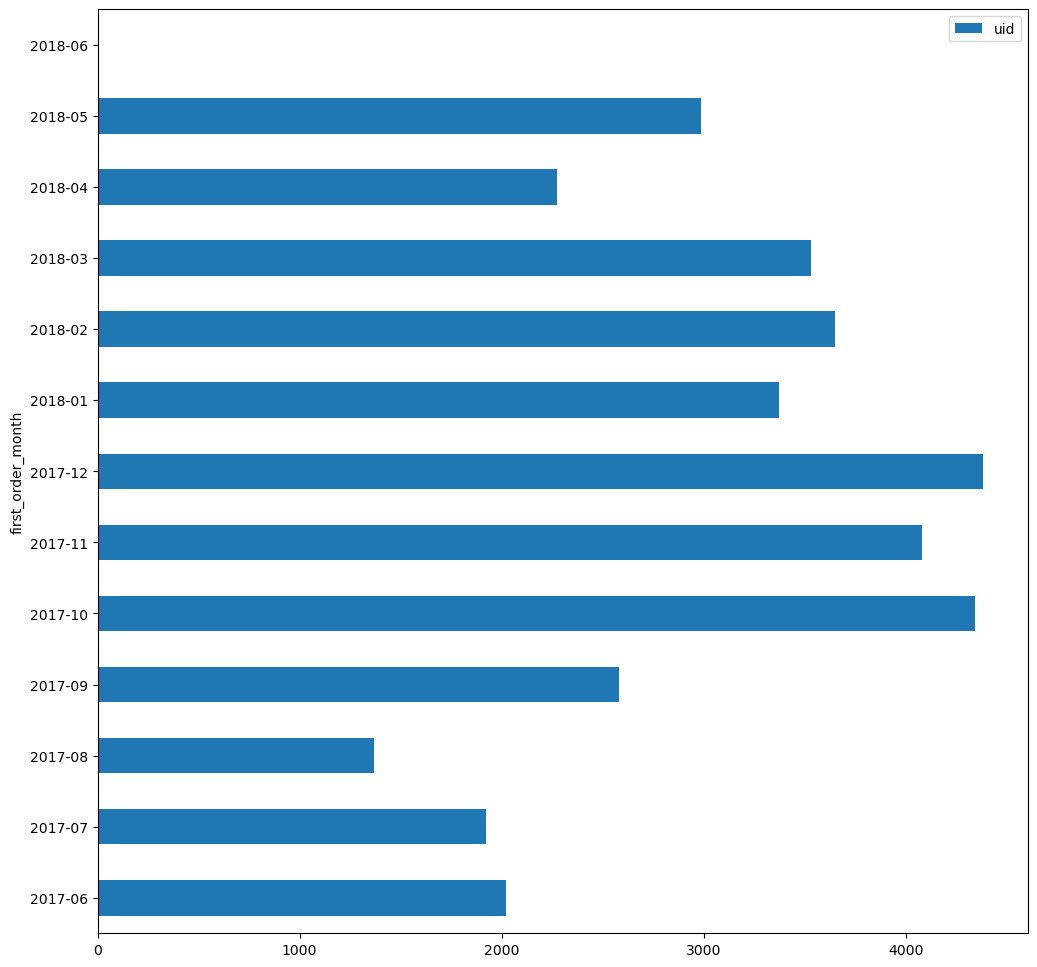

In [28]:
df_pedidos.plot(x='first_order_month', y='uid', kind='barh', figsize=(12, 12))

Nos meses do verão(hemisfério sul) mais clientes costumam comprar.

### Qual é o volume médio de uma compra?

In [29]:
df_orders.head()

,buy_ts,revenue,uid,first_order,first_order_month,order_week,first_order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04


In [30]:
df_orders['order_month'] = df_orders['buy_ts'].dt.to_period('M')
df_orders.head()

,buy_ts,revenue,uid,first_order,first_order_month,order_week,first_order_week,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06


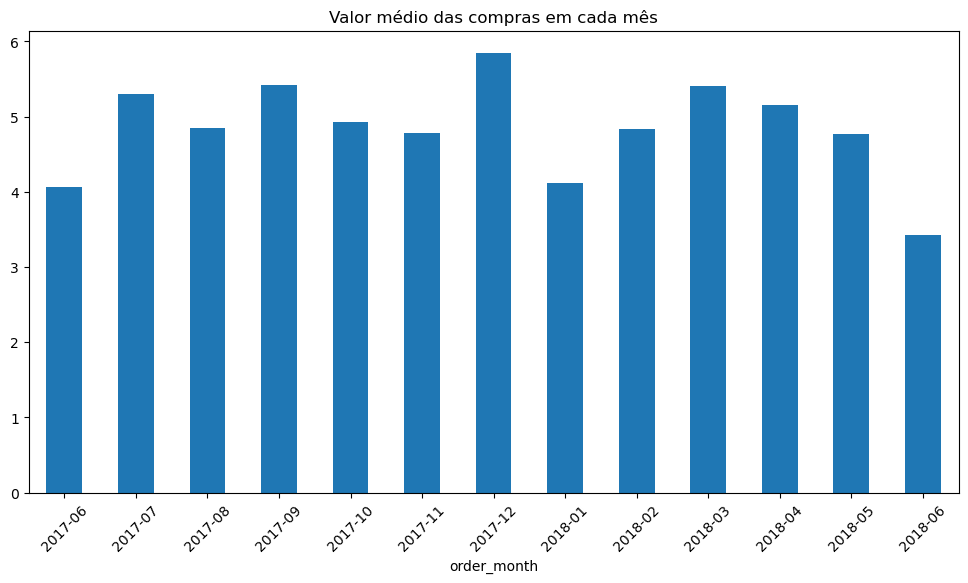

In [31]:
df_orders.groupby('order_month')['revenue'].mean().plot(kind='bar', figsize=(12, 6), rot=45, title='Valor médio das compras em cada mês')
plt.show()

### Quanto dinheiro eles trazem para a empresa (LTV)?

In [32]:
df_orders.head()

,buy_ts,revenue,uid,first_order,first_order_month,order_week,first_order_week,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,2017-05-29/2017-06-04,2017-05-29/2017-06-04,2017-06


Calculando LTV:
* Descubra a data da primeira compra de cada cliente* 
Calcule a quantidade de novos clientes por cada data (ou intervalo de datas — neste caso, para cada mês
* 
Inclua o mês do primeiro pedido na tabela de pedi
* s
Agrupe a tabela e calcule a receita

In [33]:
primeiros_pedidos = df_orders[['uid', 'first_order_month']].drop_duplicates(subset='uid')
primeiros_pedidos.head()

,uid,first_order_month
0,10329302124590727494,2017-06
1,11627257723692907447,2017-06
2,17903680561304213844,2017-06
3,16109239769442553005,2017-06
4,14200605875248379450,2017-06


In [34]:
cohort_sizes = primeiros_pedidos.groupby('first_order_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [35]:
cohorts = df_orders.groupby(['first_order_month', 'order_month'])['revenue'].sum().reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


In [36]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06,2023,2017-06,9557.49
1,2017-06,2023,2017-07,981.82
2,2017-06,2023,2017-08,885.34
3,2017-06,2023,2017-09,1931.30
4,2017-06,2023,2017-10,2068.58


In [37]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   first_order_month  79 non-null     period[M]
 1   n_buyers           79 non-null     int64    
 2   order_month        79 non-null     period[M]
 3   revenue            79 non-null     float64  
dtypes: float64(1), int64(1), period[M](2)
memory usage: 2.6 KB


In [38]:
report['first_order_month_num'] = report['first_order_month'].apply(lambda x: x.ordinal)
report['order_month_num'] = report['order_month'].apply(lambda x: x.ordinal)
report['age'] = (report['order_month_num'] - report['first_order_month_num'])
report.drop(columns=['first_order_month_num', 'order_month_num'], inplace=True)

In [39]:
report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06,2023,2017-06,9557.49,0
1,2017-06,2023,2017-07,981.82,1
2,2017-06,2023,2017-08,885.34,2
3,2017-06,2023,2017-09,1931.30,3
4,2017-06,2023,2017-10,2068.58,4


In [40]:
report['ltv'] = report['revenue'] / report['n_buyers']
output = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
)
output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ao final de 1 ano os clientes costumam trazer em média 11.88$ em valor.

## Marketing

### Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

In [41]:
df_costs['month'] = df_costs['dt'].dt.to_period('M')
df_costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [42]:
monthly_costs = df_costs.groupby('month')['costs'].sum()
monthly_costs.head()

month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
Freq: M, Name: costs, dtype: float64

Custo total

In [43]:
df_costs.groupby('source_id')['costs'].sum().sum().round(2)

329131.62

Custo por origem

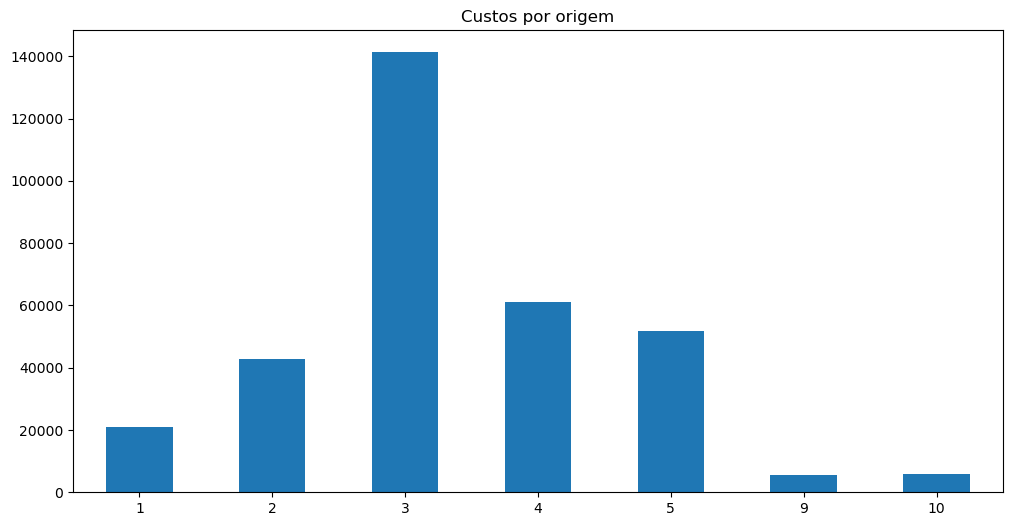

In [44]:
df_costs.groupby('source_id')['costs'].sum().plot(kind='bar', figsize=(12, 6), rot=0, title='Custos por origem')
plt.xlabel('')
plt.show()

Custo mensal

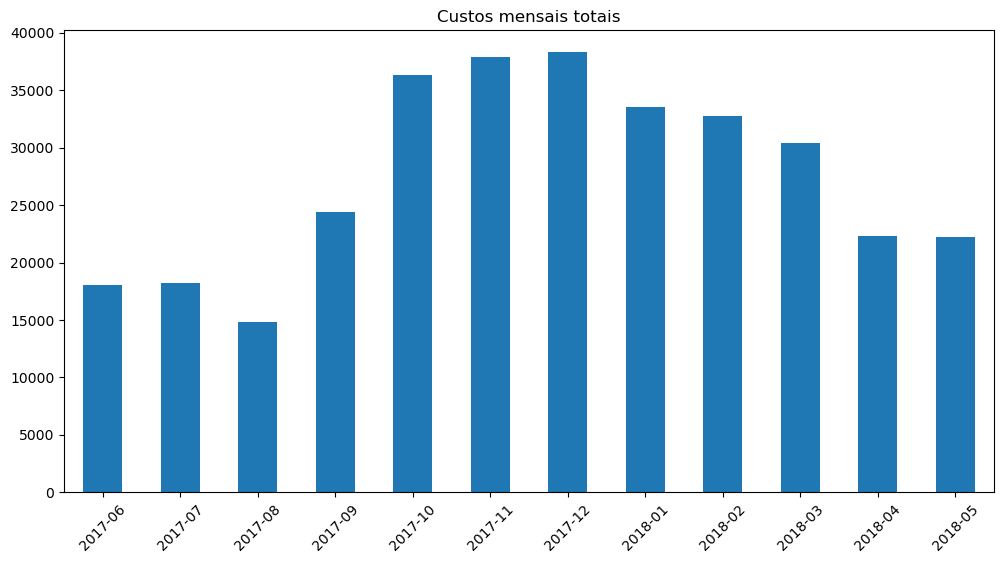

In [45]:
df_costs.groupby('month')['costs'].sum().plot(kind='bar', figsize=(12, 6), rot=45, title='Custos mensais totais')
plt.xlabel('')
plt.show()

Custo acumulado

In [47]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06,2023,2017-06,9557.49,0,4.724414,18015.0,8.905091
1,2017-06,2023,2017-07,981.82,1,0.485329,18015.0,8.905091
2,2017-06,2023,2017-08,885.34,2,0.437637,18015.0,8.905091
3,2017-06,2023,2017-09,1931.30,3,0.954671,18015.0,8.905091
4,2017-06,2023,2017-10,2068.58,4,1.022531,18015.0,8.905091


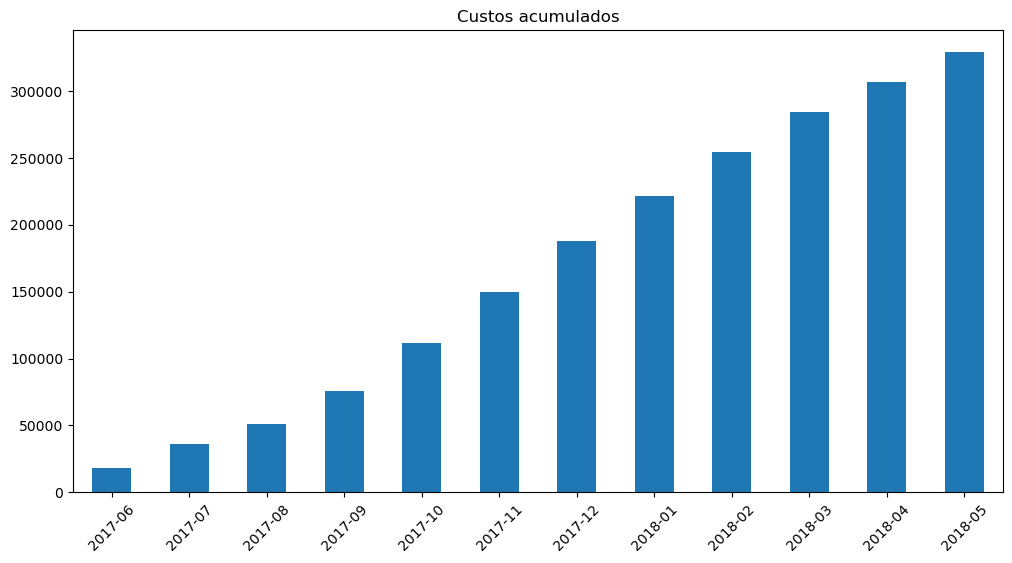

In [48]:
report_.groupby('order_month')['costs'].sum().plot(kind='bar', figsize=(12, 6), rot=45, title='Custos acumulados')
plt.xlabel('')
plt.show()

### Quanto custou a aquisição de clientes para cada origem?

In [49]:
report_.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06,2023,2017-06,9557.49,0,4.724414,18015.0,8.905091
1,2017-06,2023,2017-07,981.82,1,0.485329,18015.0,8.905091
2,2017-06,2023,2017-08,885.34,2,0.437637,18015.0,8.905091
3,2017-06,2023,2017-09,1931.30,3,0.954671,18015.0,8.905091
4,2017-06,2023,2017-10,2068.58,4,1.022531,18015.0,8.905091


In [50]:
df_costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05
2538,10,2018-05-28,21.26,2018-05
2539,10,2018-05-29,11.32,2018-05
2540,10,2018-05-30,33.15,2018-05


In [51]:
pedidos = df_orders[['uid', 'first_order']].drop_duplicates(subset='uid')
pedidos_ = pedidos.groupby('first_order')['uid'].nunique().reset_index()
pedidos_.columns = ['first_order', 'n_buyers']
pedidos_.head()

,first_order,n_buyers
0,2017-06-01,86
1,2017-06-02,97
2,2017-06-03,57
3,2017-06-04,55
4,2017-06-05,141


In [52]:
custos = pd.merge(df_costs, pedidos_, left_on='dt', right_on='first_order').drop_duplicates()
custos

,source_id,dt,costs,month,first_order,n_buyers
0,1,2017-06-01,75.20,2017-06,2017-06-01,86
1,1,2017-06-02,62.25,2017-06,2017-06-02,97
2,1,2017-06-03,36.53,2017-06,2017-06-03,57
3,1,2017-06-04,55.00,2017-06,2017-06-04,55
4,1,2017-06-05,57.08,2017-06,2017-06-05,141
...,...,...,...,...,...,...
2536,10,2018-05-27,9.92,2018-05,2018-05-27,65
2537,10,2018-05-28,21.26,2018-05,2018-05-28,129
2538,10,2018-05-29,11.32,2018-05,2018-05-29,128
2539,10,2018-05-30,33.15,2018-05,2018-05-30,146


In [53]:
custos['cac'] = custos['costs'] / custos['n_buyers']
custos

,source_id,dt,costs,month,first_order,n_buyers,cac
0,1,2017-06-01,75.20,2017-06,2017-06-01,86,0.874419
1,1,2017-06-02,62.25,2017-06,2017-06-02,97,0.641753
2,1,2017-06-03,36.53,2017-06,2017-06-03,57,0.640877
3,1,2017-06-04,55.00,2017-06,2017-06-04,55,1.000000
4,1,2017-06-05,57.08,2017-06,2017-06-05,141,0.404823
...,...,...,...,...,...,...,...
2536,10,2018-05-27,9.92,2018-05,2018-05-27,65,0.152615
2537,10,2018-05-28,21.26,2018-05,2018-05-28,129,0.164806
2538,10,2018-05-29,11.32,2018-05,2018-05-29,128,0.088438
2539,10,2018-05-30,33.15,2018-05,2018-05-30,146,0.227055


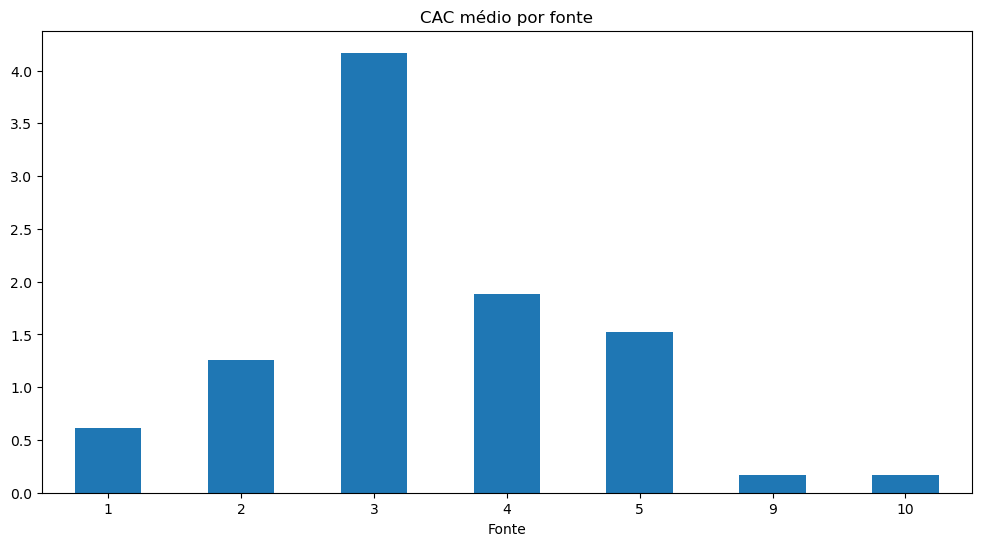

In [54]:
custos.groupby('source_id')['cac'].mean().plot(kind='bar', xlabel='Fonte', rot=0, title='CAC médio por fonte', figsize=(12, 6))
plt.show()

As fontes 1, 9 e 10 têm um custo de aquisição médio baixo, o que indica que são melhores meios de conquistar o cliente.

### Os investimentos valeram a pena? (ROI)

In [55]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month',
    columns='age',
    values='romi',
    aggfunc='mean'
)

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As coortes de junho e setembro foram as únicas que cobriram suas despesas.

#### Coorte média

In [56]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

Em média, as coortes cobrem suas despesas no 10º mês.

# Recomendações aos especialistas de marketing: Quanto dinheiro e onde seria melhor investir?

## Quais origens/plataformas você recomendaria?

As origens com melhor custo de aquisição de cliente foram as 1, 9 e 10.

Clientes da plataforma Desktop têm uma tendência ligeiramente maior a fazerem a compra logo após o registro, tornando-os mais fáceis de se tornarem clientes definitivos.

## Fundamente sua escolha: em quais métricas você se concentrou? Por quê?

Inicialmente foram criados cohorts mensais e semanais, mas o mensais se mostraram mais promissores em termos de análise. Foram feitas medidas de quantidade de sessões por dia, tempo médio das sessões, frequência média de retorno de usuários, soma de acessos em cada dispositivo e canal de marketing, número de pedidos ao longo do tempo, volume médio de uma compra, LTV, CAC e ROI.

## Que conclusões você tirou ao encontrar os valores das métricas?

O ideal seria investir mais nos canais de marketing 1, 9 e 10, já que são mais eficientes, e eles terão um papel essencial para melhorar ainda mais a meta colocada abaixo:

Os anúncios costumam cobrir suas despesas após 10 meses. Se quisermos melhorar o tempo que levamos para cobrir os anúncios, determinando uma meta de 6 meses, podemos determinar o LTV acumulado por 6 meses a partir do momento em que o primeiro pedido foi feito. Desta forma sabemos quanto podemos gastar para adquirir um cliente.

In [57]:
m6_cum_ltv = output.cumsum(axis=1).mean(axis=0)[5]
print('LTV médio aos 6 meses após a primeira compra:', m6_cum_ltv)

LTV médio aos 6 meses após a primeira compra: 0.8598760895593338
